<a href="https://colab.research.google.com/github/Tecindes/ClasificacionValidacion/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [52]:
import pandas as pd


In [53]:
datos =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prestacar.csv')

In [54]:
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [55]:
X=datos.drop(columns='moroso',axis=1) #explicativas
y=datos['moroso']

In [56]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y) # para ver puntaje del modelo

1.0

In [57]:
print(f'La exactitud del modelo es :{modelo.score(X,y)}')

La exactitud del modelo es :1.0


### Ejercicio Propio - Para verificar si esta sobreajustado

In [58]:
from sklearn.model_selection import train_test_split
XX=datos.drop(columns='moroso',axis=1) #explicativas
yy=datos['moroso']
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.15, random_state=5)
modelo1 = DecisionTreeClassifier()
modelo1.fit(XX_train, yy_train) # sin parametros siempre 100%
print("Score en entrenamiento:", modelo1.score(XX_train, yy_train))
print("Score en prueba:", modelo1.score(XX_test, yy_test))
print('Si el score en prueba cae bastante (por ejemplo, baja de 100% a 80%), entonces el modelo está sobreajustado.')

Score en entrenamiento: 1.0
Score en prueba: 0.8516781836130306
Si el score en prueba cae bastante (por ejemplo, baja de 100% a 80%), entonces el modelo está sobreajustado.


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [59]:
from sklearn.model_selection import train_test_split


In [60]:
X,X_test,y,y_test=train_test_split(X,y,test_size=0.15, stratify=y,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X,y, stratify=y,random_state=5)

In [61]:
modelo=DecisionTreeClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo de entrenamiento es:{modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo de validación es:{modelo.score(X_val,y_val)}')

La exactitud del modelo de entrenamiento es:1.0
La exactitud del modelo de validación es:0.846441947565543


In [62]:
modelo=DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo de entrenamiento es:{modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo de validación es:{modelo.score(X_val,y_val)}')

La exactitud del modelo de entrenamiento es:0.9205574912891986
La exactitud del modelo de validación es:0.9059315390645414


### Evaluando el modelo

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
y_previsto=modelo.predict(X_val )
matriz_confusion=confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[10359   120]
 [  960    42]]


In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

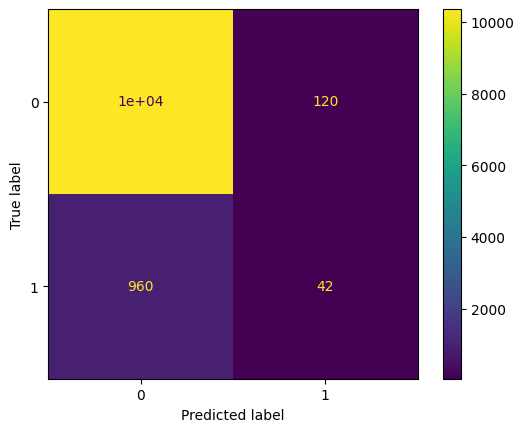

In [66]:
visualizacion=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion)
visualizacion.plot();

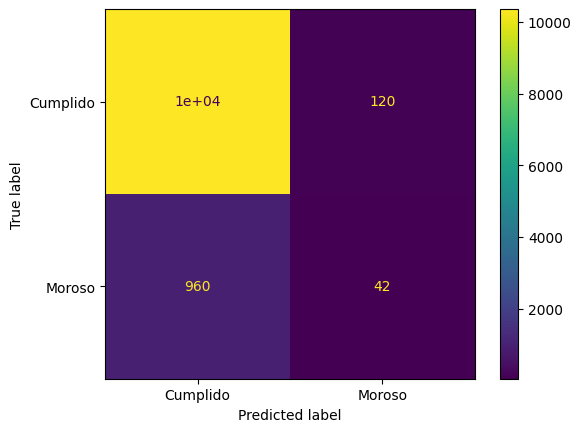

In [67]:
visualizacion=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Cumplido','Moroso'])
visualizacion.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [69]:
45/(45+123) # precisión

0.26785714285714285

In [70]:
print(f'la precisión del modelo es : {precision_score(y_val,y_previsto)}')
print(f'la sensibilidad (Recall) del modelo es : {recall_score(y_val,y_previsto)}')
print(f'la exactitud (accuracy) del modelo es : {accuracy_score(y_val,y_previsto)}')

la precisión del modelo es : 0.25925925925925924
la sensibilidad (Recall) del modelo es : 0.041916167664670656
la exactitud (accuracy) del modelo es : 0.9059315390645414


In [71]:
print(f'El F1-score del modelo es : {f1_score(y_val,y_previsto)}')

El F1-score del modelo es : 0.07216494845360824


### Curva ROC

In [72]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [73]:
from sklearn.metrics import RocCurveDisplay

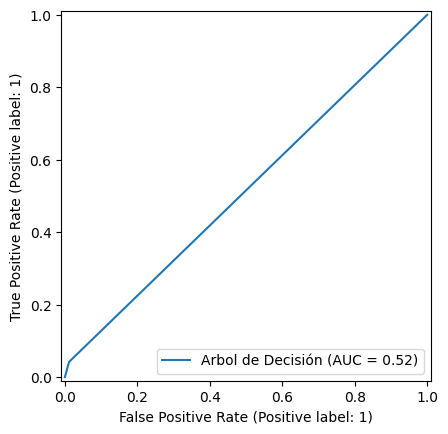

In [74]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Arbol de Decisión');

In [75]:
from sklearn.metrics import roc_auc_score

In [76]:
print (f'El área bajo la curva ROC del modelo es : {roc_auc_score(y_val,y_previsto)}')

El área bajo la curva ROC del modelo es : 0.5152323466436723


### Curva de  precisión x sensibilidad

In [77]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [78]:
from sklearn.metrics import PrecisionRecallDisplay

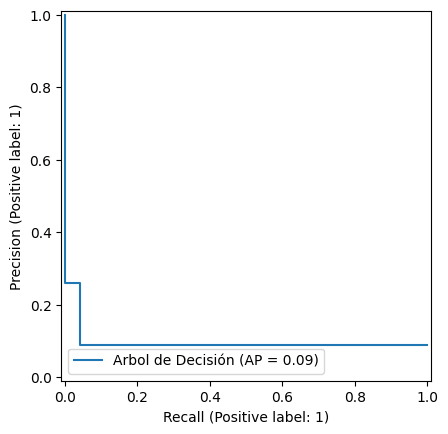

In [79]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name='Arbol de Decisión');

In [80]:
from sklearn.metrics import average_precision_score

In [81]:
print(f'El score promedio de precisión vsrevall es:{average_precision_score(y_val,y_previsto)}')

El score promedio de precisión vsrevall es:0.09448356430013705


### Informe de métricas

In [82]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [84]:
from sklearn.model_selection import KFold,cross_validate

In [85]:
modelo=DecisionTreeClassifier(max_depth=10)
modelo

DecisionTreeClassifier(max_depth=10)

In [86]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
kf

KFold(n_splits=5, random_state=5, shuffle=True)

In [87]:
X

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono
29662,13500.000000,2859.750000,12.157324,1,2.0,0.501213,0.576202,0.513171,0.117428,0.000000
34708,15750.000000,948.600000,11.000000,1,2.0,0.501213,0.652596,0.513171,0.103100,2659.000000
23846,15750.000000,3883.950000,14.000000,0,2.0,0.426097,0.248652,0.513171,0.092800,2071.000000
30324,16855.246324,5090.400000,2.000000,0,2.0,0.501213,0.464837,0.513171,0.117428,789.000000
52286,11250.000000,2722.188351,12.157324,1,2.0,0.501213,0.098006,0.513171,0.117428,233.000000
...,...,...,...,...,...,...,...,...,...,...
18325,13500.000000,2238.300000,12.157324,0,2.0,0.769342,0.641752,0.513171,0.016500,1292.000000
47857,13500.000000,1773.900000,12.157324,1,2.0,0.197717,0.620893,0.513171,0.084500,281.000000
1486,27000.000000,2722.188351,3.000000,0,1.0,0.501213,0.695173,0.718033,0.072200,962.106056
919,17100.000000,1994.850000,4.000000,0,2.0,0.501213,0.675887,0.513171,0.117428,1110.000000


In [88]:
y

,moroso
29662,0
34708,0
23846,0
30324,0
52286,1
...,...
18325,0
47857,0
1486,0
919,0


In [89]:
cv_resultado=cross_validate(modelo,X,y,cv=kf)
cv_resultado

{'fit_time': array([0.24405861, 0.26666355, 0.23255563, 0.35407233, 0.34979153]),
 'score_time': array([0.00366306, 0.00351858, 0.00481725, 0.00504589, 0.00516462]),
 'test_score': array([0.91333696, 0.90810105, 0.90690331, 0.91343641, 0.89928136])}

In [90]:
cv_resultado['test_score']

array([0.91333696, 0.90810105, 0.90690331, 0.91343641, 0.89928136])

In [91]:
promedio = cv_resultado['test_score'].mean()
desvio_std= cv_resultado['test_score'].std()
print(f'El promedio de exactitud del modelo es: {promedio}')
print(f'El desvio tipico del modelo es: {desvio_std}')
print(f'El intervalo de confianza del modelo es: [{promedio-2*desvio_std},{promedio+2*desvio_std}]')
print(f'El intervalo de confianza del modelo es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de exactitud del modelo es: 0.9082118175748597
El desvio tipico del modelo es: 0.005196942228044202
El intervalo de confianza del modelo es: [0.8978179331187713,0.918605702030948]
El intervalo de confianza del modelo es: [0.8978179331187713,0.918605702030948]


### Validación cruzada con sensibilidad

In [92]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std= resultados['test_score'].std()
  return print(f'El promedio de exactitud del modelo es: {promedio}\nEl desvio tipico del modelo es: {desvio_std}\nEl intervalo de confianza del modelo es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

In [93]:
modelo=DecisionTreeClassifier(max_depth=10)
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultado=cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultado


{'fit_time': array([0.34380627, 0.34337044, 0.35066867, 0.32280493, 0.33953309]),
 'score_time': array([0.00891685, 0.01092362, 0.00883007, 0.0079937 , 0.00812054]),
 'test_score': array([0.02642008, 0.01980198, 0.01845018, 0.01436031, 0.02543353])}

In [94]:
intervalo_confianza(cv_resultado)

El promedio de exactitud del modelo es: 0.02089321665751804
El desvio tipico del modelo es: 0.004494410939255837
El intervalo de confianza del modelo es: [0.011904394779006365,0.029882038536029713]


### Estratificando los datos

In [95]:
datos['moroso'].value_counts()

,count
moroso,
0,49309
1,4716


In [99]:
datos['moroso'].value_counts(normalize=True)

,proportion
moroso,
0,0.912707
1,0.087293


In [96]:
from sklearn.model_selection import StratifiedKFold

In [97]:
modelo=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultado=cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultado

{'fit_time': array([0.34343982, 0.34016705, 0.34019327, 0.3540926 , 0.29129672]),
 'score_time': array([0.00896811, 0.00926542, 0.00960398, 0.01069832, 0.00639319]),
 'test_score': array([0.02774108, 0.01980198, 0.02091021, 0.01305483, 0.02427746])}

In [98]:
intervalo_confianza(cv_resultado)

El promedio de exactitud del modelo es: 0.02115711189159312
El desvio tipico del modelo es: 0.004911813106834095
El intervalo de confianza del modelo es: [0.011333485677924932,0.03098073810526131]


## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
over_sampling=SMOTE()
X_balanceada,y_balanceada=over_sampling.fit_resample(X,y)

In [102]:
y_balanceada.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


In [104]:
y_balanceada.value_counts()

,count
moroso,
0,41912
1,41912


In [103]:
X_balanceada.value_counts(normalize=True)

ingresos_cliente  anualidad_prestamo  años_casa_propia  telefono_trab  evaluacion_ciudad  score_1   score_2   score_3   score_social  cambio_telefono
11250.0           4032.000000         12.157324         0              2.0                0.386664  0.504867  0.513171  0.117428      518.0              0.000143
13500.0           4729.950000         12.157324         0              3.0                0.416651  0.175268  0.513171  0.117428      315.0              0.000131
24300.0           2664.000000         12.157324         1              2.0                0.617599  0.263144  0.513171  0.117428      229.0              0.000131
45000.0           2722.188351         12.157324         1              2.0                0.271173  0.706583  0.665855  0.100300      397.0              0.000119
13500.0           2160.900000         12.157324         0              2.0                0.501213  0.591482  0.513171  0.117428      3269.0             0.000119
                                                                                                                                                           ...   
                  2722.188351         5.000000          0              2.0                0.672805  0.185386  0.508287  0.117428      1655.0             0.000012
                                                                                          0.592287  0.635170  0.680139  0.117428      883.0              0.000012
                                                                                          0.562895  0.649133  0.429424  0.152600      1119.0             0.000012
                                                                                          0.501213  0.673862  0.223831  0.005200      840.0              0.000012
                                                        1              2.0                0.501213  0.516877  0.513171  0.024700      1298.0             0.000012
Name: proportion, Length: 82359, dtype: float64

In [105]:
modelo=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,X_balanceada,y_balanceada,cv=skf,scoring='recall')
cv_resultado

{'fit_time': array([0.34343982, 0.34016705, 0.34019327, 0.3540926 , 0.29129672]),
 'score_time': array([0.00896811, 0.00926542, 0.00960398, 0.01069832, 0.00639319]),
 'test_score': array([0.02774108, 0.01980198, 0.02091021, 0.01305483, 0.02427746])}

In [106]:
intervalo_confianza(cv_resultados)

El promedio de exactitud del modelo es: 0.7149500928652774
El desvio tipico del modelo es: 0.01075302979704481
El intervalo de confianza del modelo es: [0.6934440332711879,0.736456152459367]


### Pipeline para validación

In [107]:
from imblearn.pipeline import Pipeline as imbpipeline

In [108]:
modelo=DecisionTreeClassifier(max_depth=10)
pipeline=imbpipeline([('oversample',SMOTE()),('arbol',modelo)])


In [109]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(pipeline,X,y,cv=skf,scoring='recall')
cv_resultados

{'fit_time': array([1.23318362, 0.99849153, 0.97445393, 0.93079066, 1.44089818]),
 'score_time': array([0.01140523, 0.01776981, 0.01052022, 0.01071548, 0.00684929]),
 'test_score': array([0.28927681, 0.27965044, 0.2680798 , 0.28553616, 0.20822943])}

In [110]:
intervalo_confianza(cv_resultados)

El promedio de exactitud del modelo es: 0.26615452629350467
El desvio tipico del modelo es: 0.029837731479178335
El intervalo de confianza del modelo es: [0.20647906333514798,0.32582998925186135]


### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [111]:
from imblearn.under_sampling import NearMiss

In [122]:
modelo=DecisionTreeClassifier(max_depth=10)
pipeline=imbpipeline([('undersample',NearMiss(version=3)),('arbol',modelo)])
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(pipeline,X,y,cv=skf,scoring='recall')
cv_resultados

{'fit_time': array([0.21242547, 0.20825934, 0.22770286, 0.20454597, 0.20971966]),
 'score_time': array([0.00697136, 0.00666356, 0.00645876, 0.00687432, 0.006634  ]),
 'test_score': array([0.67581047, 0.6267166 , 0.67456359, 0.66957606, 0.64962594])}

In [123]:
intervalo_confianza(cv_resultados)

El promedio de exactitud del modelo es: 0.6592585328190136
El desvio tipico del modelo es: 0.018795887711727365
El intervalo de confianza del modelo es: [0.6216667573955589,0.6968503082424683]


### Probando el modelo

In [124]:
undersample=NearMiss(version=3)
x_balanceada,y_balanceada=undersample.fit_resample(X,y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



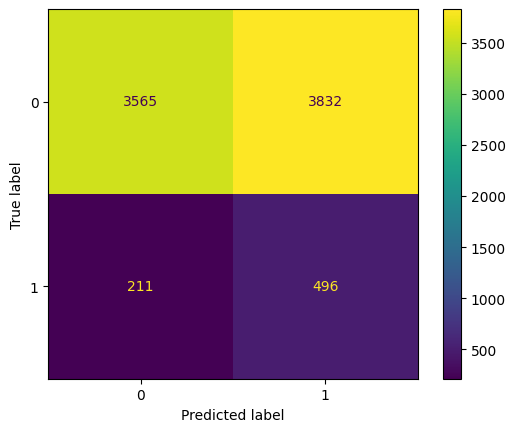

In [128]:
modelo=DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada,y_balanceada)
y_previsto=modelo.predict(X_test)
print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto) ;

In [129]:
X

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono
29662,13500.000000,2859.750000,12.157324,1,2.0,0.501213,0.576202,0.513171,0.117428,0.000000
34708,15750.000000,948.600000,11.000000,1,2.0,0.501213,0.652596,0.513171,0.103100,2659.000000
23846,15750.000000,3883.950000,14.000000,0,2.0,0.426097,0.248652,0.513171,0.092800,2071.000000
30324,16855.246324,5090.400000,2.000000,0,2.0,0.501213,0.464837,0.513171,0.117428,789.000000
52286,11250.000000,2722.188351,12.157324,1,2.0,0.501213,0.098006,0.513171,0.117428,233.000000
...,...,...,...,...,...,...,...,...,...,...
18325,13500.000000,2238.300000,12.157324,0,2.0,0.769342,0.641752,0.513171,0.016500,1292.000000
47857,13500.000000,1773.900000,12.157324,1,2.0,0.197717,0.620893,0.513171,0.084500,281.000000
1486,27000.000000,2722.188351,3.000000,0,1.0,0.501213,0.695173,0.718033,0.072200,962.106056
919,17100.000000,1994.850000,4.000000,0,2.0,0.501213,0.675887,0.513171,0.117428,1110.000000
